# 1.2: sigmoid 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    

In [2]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [3]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [4]:
y

array([[75.],
       [80.],
       [93.]])

In [5]:
X=X/np.amax(X,axis=0)
y=y/100

In [6]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [7]:
NNS=Neural_Network()

In [8]:
yH=NNS.forward(X)

In [9]:
yH

array([[0.67314024],
       [0.66668939],
       [0.67672649]])

In [10]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

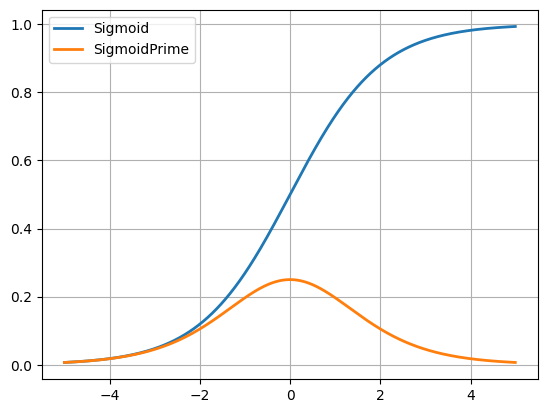

In [11]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NNS.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NNS.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])


In [12]:
NNS=Neural_Network()

In [13]:
cost1=NNS.costFunction(X,y)

In [14]:
cost1

array([0.01872412])

In [15]:
dJdW1,dJdW2=NNS.costFunctionPrime(X,y)

In [16]:
dJdW1

array([[-0.00496544, -0.00551173, -0.00483843],
       [-0.00090661, -0.0009859 , -0.00083348]])

In [17]:
dJdW2

array([[-0.02578022],
       [-0.02997234],
       [-0.02824863]])

In [18]:
scalar=1
NNS.W1 = NNS.W1+scalar*dJdW1
NNS.W2 = NNS.W2+scalar*dJdW2
cost2 = NNS.costFunction(X,y)
print (cost1,cost2)

[0.01872412] [0.02136227]


In [19]:
scalar=0.1
NNS.W1 = NNS.W1-scalar*dJdW1
NNS.W2 = NNS.W2-scalar*dJdW2
cost3 = NNS.costFunction(X,y)
print (cost2,cost3)

[0.02136227] [0.02108048]


Text(0.5, 1.0, 'Cost & Iteration')

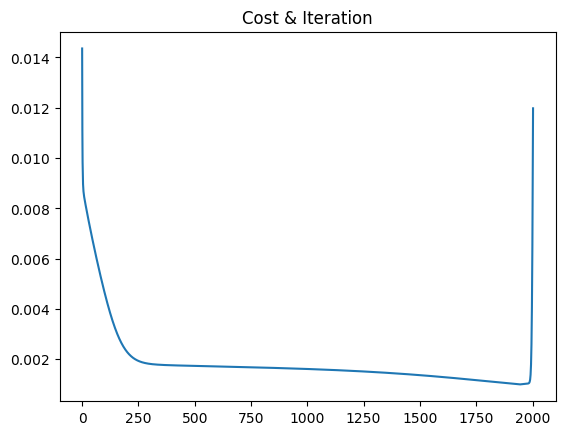

In [20]:
scalar = 3
data = []

NNS = Neural_Network()
cost = NNS.costFunction(X,y)

while (cost > 0.001): 
    dJdW1,dJdW2=NNS.costFunctionPrime(X,y) 
    NNS.W1 = NNS.W1-scalar*dJdW1
    NNS.W2 = NNS.W2-scalar*dJdW2
    cost = NNS.costFunction(X,y) 
    data.append(cost)
    
    #if (scalar > 9): 
      #  scalar -= 1
        
while (cost < 0.01): 
    dJdW1,dJdW2=NNS.costFunctionPrime(X,y) 
    NNS.W1 = NNS.W1+scalar*dJdW1
    NNS.W2 = NNS.W2+scalar*dJdW2
    cost = NNS.costFunction(X,y) 
    data.append(cost)

yHat = NNS.forward(X)
        
yHat

plt.plot(data)
plt.title('Cost & Iteration')


# 1.3: Relu 

In [21]:
class r_Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
        

    def reluforward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def relucostFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.reluforward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def relucostFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.reluforward(X)
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    


Text(0.5, 1.0, 'Cost & Iteration')

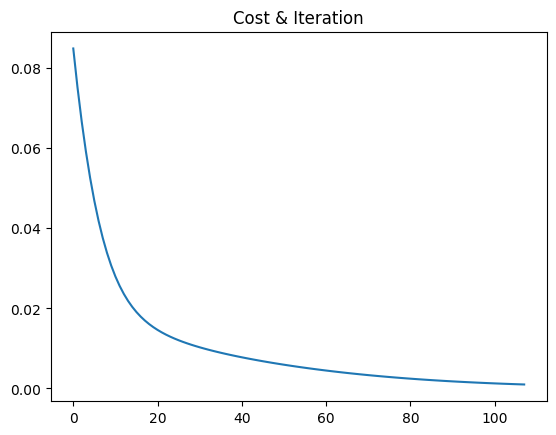

In [22]:
scalar = 0.1
data = []

NNR = r_Neural_Network()
cost = NNR.relucostFunction(X,y)

while (cost > 0.001): 
    dJdW1,dJdW2=NNR.relucostFunctionPrime(X,y) 
    NNR.W1 = NNR.W1-scalar*dJdW1
    NNR.W2 = NNR.W2-scalar*dJdW2
    cost = NNR.relucostFunction(X,y) 
    data.append(cost)
    
    #if (scalar > 9): 
      #  scalar -= 1
        


yHat = NNR.reluforward(X)
        
yHat

plt.plot(data)
plt.title('Cost & Iteration')

# 1.3: Relu with hidden layers

In [147]:
#Adding another hidden layer 
class r_Neural_Network_HL(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayer1Size=3
        self.hiddenLayer2Size=3
    
        self.costList = []
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayer1Size)
        self.W2=np.random.rand(self.hiddenLayer1Size,self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size,self.outputLayerSize)

    def reluforward_HL(self,X):
        #Propagate inputs through network
        self.z1 = np.dot(X,self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W3)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def relucostFunction_HL(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.reluforward_HL(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def relucostFunctionPrime_HL(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.reluforward_HL(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW3 = np.dot(self.a2.T,delta3)
        delta2 = np.dot(delta3,self.W3.T)*self.reluPrime(self.z2)
        dJdW2 = np.dot(self.a1.T,delta2)
        delta1 = np.dot(delta2,self.W2.T)*self.reluPrime(self.z1)
        dJdW1 = np.dot(X.T,delta1)
        return dJdW1,dJdW2,dJdW3

In [148]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)
X=X/np.amax(X,axis=0)
y=y/100
NN7=r_Neural_Network_HL()
yH=NN7.reluforward_HL(X)

In [149]:
def plotNNCost(NN):
    iterArr = np.arange(1, len(NN.costList)+1)
    plt.plot(iterArr,NN.costList)
    plt.title("Neural Net Cost vs. Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")

In [150]:
np.random.seed(27)
#NN7.hiddenLayer2Size=3
#NN7.W3= np.random.rand(NN7.hiddenLayer1Size, NN7.hiddenLayer2Size)
#NN7.W2= np.random.rand(NN7.hiddenLayer2Size, NN7.outputLayerSize)

In [151]:
NN7.hiddenLayer2Size,NN7.W3, NN7.W2

(3,
 array([[0.64889995],
        [0.91097121],
        [0.12165793]]),
 array([[0.5202925 , 0.87736578, 0.92388931],
        [0.48923016, 0.59621396, 0.26427542],
        [0.9917109 , 0.21039796, 0.58337008]]))

In [152]:
scalar = 0.1
data = []

#NN = r_Neural_Network_HL()
index = 0
while (1 -  NN7.relucostFunction_HL(X,y) < 0.999): 
    index += 1
    dJdW1,dJdW2,dJdW3=NN7.relucostFunctionPrime_HL(X,y) 
    NN7.W1 = NN7.W1-scalar*dJdW1
    NN7.W2 = NN7.W2-scalar*dJdW2
    NN7.W3 = NN7.W3-scalar*dJdW3
    cost = NN7.relucostFunction_HL(X,y)
    data.append(cost)
    
    #if (scalar > 9): 
      #  scalar -= 1
        


yHat = NN7.reluforward_HL(X)

In [153]:
yH

array([[0.93022178],
       [0.79227664],
       [0.90647189]])

In [154]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

In [155]:
index

579

In [156]:
#trainReluNN2(NN7, X, y, 3)
#testNN(NN7, X, y), 
#plotNNCost(NN7)

In [157]:
#Adding another hidden layer: 10 units
class r_Neural_Network_HL(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayer1Size=3
        self.hiddenLayer2Size=10
    
        self.costList = []
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayer1Size)
        self.W2=np.random.rand(self.hiddenLayer1Size,self.hiddenLayer2Size)
        self.W3=np.random.rand(self.hiddenLayer2Size,self.outputLayerSize)

    def reluforward_HL(self,X):
        #Propagate inputs through network
        self.z1 = np.dot(X,self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W3)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def relucostFunction_HL(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.reluforward_HL(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def relucostFunctionPrime_HL(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.reluforward_HL(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW3 = np.dot(self.a2.T,delta3)
        delta2 = np.dot(delta3,self.W3.T)*self.reluPrime(self.z2)
        dJdW2 = np.dot(self.a1.T,delta2)
        delta1 = np.dot(delta2,self.W2.T)*self.reluPrime(self.z1)
        dJdW1 = np.dot(X.T,delta1)
        return dJdW1,dJdW2,dJdW3

In [158]:
np.random.seed(27)
NN8 = r_Neural_Network_HL()

In [159]:
NN8.hiddenLayer2Size,NN8.W1, NN8.W2

(10,
 array([[0.42572141, 0.81458374, 0.73539729],
        [0.8680032 , 0.38338077, 0.97945663]]),
 array([[0.89319435, 0.20971517, 0.74182765, 0.66314332, 0.88680146,
         0.85801271, 0.74926221, 0.87014472, 0.18675584, 0.32556672],
        [0.37293743, 0.79371303, 0.15106027, 0.1699427 , 0.08116909,
         0.30517534, 0.7832898 , 0.16290618, 0.0706413 , 0.70107117],
        [0.18097988, 0.59891725, 0.41526365, 0.51357225, 0.22065617,
         0.72557301, 0.84943495, 0.92889283, 0.73594004, 0.47658724]]))

In [160]:
scalar = 0.1
data = []

#NN = r_Neural_Network_HL()
index = 0
while (1 -  NN8.relucostFunction_HL(X,y) < 0.999): 
    index += 1
    dJdW1,dJdW2,dJdW3=NN8.relucostFunctionPrime_HL(X,y) 
    NN8.W1 = NN8.W1-scalar*dJdW1
    NN8.W2 = NN8.W2-scalar*dJdW2
    NN8.W3 = NN8.W3-scalar*dJdW3
    cost = NN8.relucostFunction_HL(X,y)
    data.append(cost)
    
    #if (scalar > 9): 
      #  scalar -= 1
        


yHat = NN8.reluforward_HL(X)

In [161]:
yH

array([[0.93022178],
       [0.79227664],
       [0.90647189]])

In [162]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

In [163]:
index

609

In [164]:
#trainReluNN2(NN8, X, y, 3)
#testNN(NN8, X, y), 
#plotNNCost(NN8)

# 1.4: Relu with hidden layers

In [37]:
NN1 = Neural_Network()
NN2 = Neural_Network()

In [38]:
#Minimize 1st NN
num_iterations = 0
costs = []
while 1 - NN1.costFunction(X, y) < .999:
    dJdW1, dJdW2 = NN1.costFunctionPrime(X, y)
    NN1.W1 = NN1.W1 - scalar*dJdW1
    NN1.W2 = NN1.W2 - scalar*dJdW2
    cost = NN1.costFunction(X, y)
    costs.append(cost)
    num_iterations += 1
iterations = np.arange(0, num_iterations)

print(num_iterations)

79120


In [49]:
#Minimize 2nd NN
num_iterations = 0
costs = []
while 1 - NN2.costFunction(X, y) < .999:
    dJdW1, dJdW2 = NN2.costFunctionPrime(X, y)
    NN2.W1 = NN2.W1 - scalar*dJdW1
    NN2.W2 = NN2.W2 - scalar*dJdW2
    cost = NN2.costFunction(X, y)
    costs.append(cost)
    num_iterations += 1
iterations = np.arange(0, num_iterations)

print(num_iterations)

851415


In [50]:
theta1 =[NN1.W1, NN1.W2]
theta1

[array([[-0.50016294,  1.83373575,  1.74573774],
        [-0.45039726, -0.725871  , -0.28491439]]),
 array([[-1.42452691],
        [ 1.7284775 ],
        [ 1.4297248 ]])]

In [51]:
theta2 =[NN2.W1, NN2.W2]
theta2

[array([[ 1.46511726,  2.36066263,  1.31322038],
        [ 0.93358441, -7.19788173,  1.30397155]]),
 array([[0.31747074],
        [1.57732184],
        [0.96124439]])]

In [52]:
t = np.arange(0,1.01,0.05)
t

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [53]:
w_hat_list = []
for time in t:
    w_hat_1 = (1-time)*theta1[0] + time*theta2[0]
    w_hat_2 = (1-time)*theta1[1] + time*theta2[1]
    w_hat = [w_hat_1, w_hat_2]
    w_hat_list.append(w_hat)

In [54]:
NN_temp = Neural_Network()

In [55]:
costs = []
iterations = np.arange(0, len(t))

for i in range(len(t)):
    NN_temp.W1 = w_hat_list[i][0]
    NN_temp.W2 = w_hat_list[i][1]
    cost = NN_temp.costFunction(X, y)
    costs.append(cost)

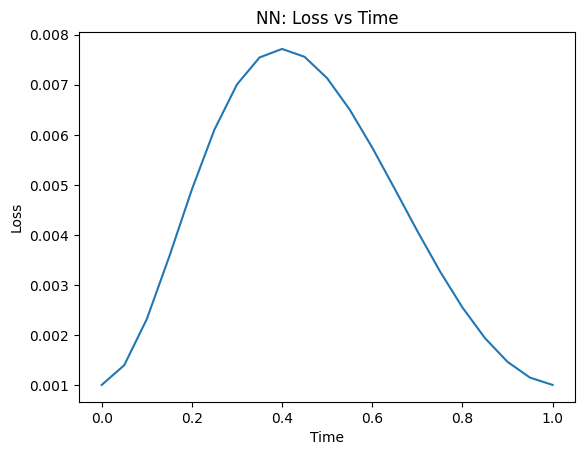

In [56]:
plt.plot(t, costs);
plt.title("NN: Loss vs Time")
plt.xlabel("Time");
plt.ylabel("Loss");

In [ ]:
# def trainNN2(NN, X, y, c):
#     cost = 1
#     while cost > .001:
#         yHat = NN.forward(X)
#         cost = NN.costFunction(X, y)
#         dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
#         NN.w1 = NN.w1-scalar*dJdW1
#         NN.w2 = NN.w2-scalar*dJdW2
#         NN.costList.append(cost)
#     print(yHat, y)
#     return NN

In [ ]:
# def trainReluNN2(NN, X, y, c):
#     cost = 1
#     while cost > .01:
#         yHat = NN.reluforward_HL(X)
#         cost = NN.relucostFunction(X, y)
#         dJdW1, dJdW2 = NN.relucostFunctionPrime(X,y)
#         NN.W1 = NN.W1-c*dJdW1
#         NN.W2 = NN.W2-c*dJdW2
#         NN.costList.append(cost)
#         c = np.random.uniform(low=.00001, high= .1)
#     return NN

In [ ]:
# def testNN(NN, X, y):
#     print("Output:", NN.reluforward_HL(X))
#     print("Cost:", NN.relucostFunction(X, y))